## データの準備

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import matplotlib.pyplot as plt
%matplotlib inline

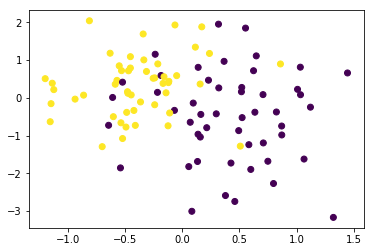

In [2]:
X, y = make_classification(n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           random_state=8,
                           n_clusters_per_class=1,
                           class_sep=0.4,
                           flip_y=0.1)
plt.scatter(X[:,0], X[:,1], c=y)

In [3]:
X.shape, y.shape

((100, 2), (100,))

### 訓練データとテストデータに分割

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1234, stratify=y)
X_train.shape, y_train.shape

((80, 2), (80,))

### データのスケーリング
- 訓練データのみを使うこと
- 決定木系のアルゴリズムでは不要の場合もある

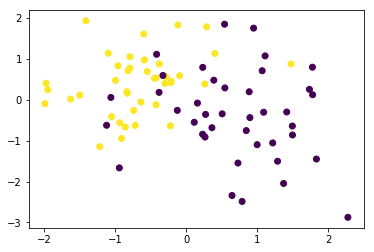

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train)

In [6]:
X_test_scaled = scaler.transform(X_test)

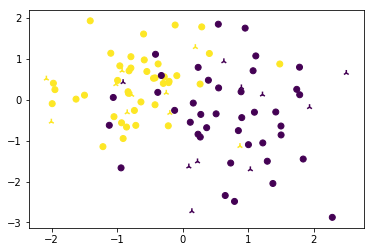

In [7]:
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train)
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], c=y_test, marker='2')

## デフォルトの SVM で訓練・評価

In [8]:
clf = SVC()
clf.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)
y_train_pred.shape

(80,)

In [10]:
print('=== for training data ===')
print(accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
print('=== for test data ===')
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

=== for training data ===
0.8625
              precision    recall  f1-score   support

           0       0.89      0.82      0.86        40
           1       0.84      0.90      0.87        40

   micro avg       0.86      0.86      0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.86      0.86      0.86        80

=== for test data ===
0.9
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.90      0.90        10

   micro avg       0.90      0.90      0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



In [11]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[33  7]
 [ 4 36]]
[[9 1]
 [1 9]]


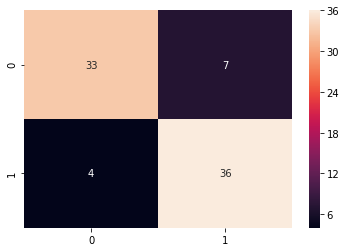

In [12]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True)

## Hyper parameter search

In [13]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ['linear', 'rbf'],
              'C': [0.1, .3, 1, 3, 10],
              'gamma': [0.1, 0.3, 1, 3, 10]}
gs = GridSearchCV(clf, parameters, cv=5)
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'rbf'], 'C': [0.1, 0.3, 1, 3, 10], 'gamma': [0.1, 0.3, 1, 3, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [14]:
gs.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [15]:
best = gs.best_estimator_
type(best)

sklearn.svm.classes.SVC

In [16]:
y_train_pred = best.predict(X_train_scaled)
y_test_pred = best.predict(X_test_scaled)

In [17]:
print('=== for training data ===')
print(accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
print('=== for test data ===')
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

=== for training data ===
0.875
              precision    recall  f1-score   support

           0       0.97      0.78      0.86        40
           1       0.81      0.97      0.89        40

   micro avg       0.88      0.88      0.88        80
   macro avg       0.89      0.88      0.87        80
weighted avg       0.89      0.88      0.87        80

=== for test data ===
0.9
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.90      0.90        10

   micro avg       0.90      0.90      0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



## これでうまくいかなかったら、特徴量、アルゴリズムを見直して、最初からリトライ